<a href="https://colab.research.google.com/github/btalbr01/MLA_BTA/blob/main/FinalProject_Classification_BTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Final Assignment 2 <br>
Ben Albright<br>
CS430-ON<br>
Machine Learning in the Cloud

Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Connect to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


These imports are for building the transformers, the pipeline, and splitting the data.

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict


These imports are specific to performing Logistic Regression using SKLearn

In [4]:
from sklearn.linear_model import LinearRegression, LogisticRegression

These imports are for various performance measures to evaluate our model.

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

Confusion Matrix Function

In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

ROC_Curve Function

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

Acquire Data

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/citrus.csv')

In [25]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [10]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

Statistics and Visual Exploration

In [11]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


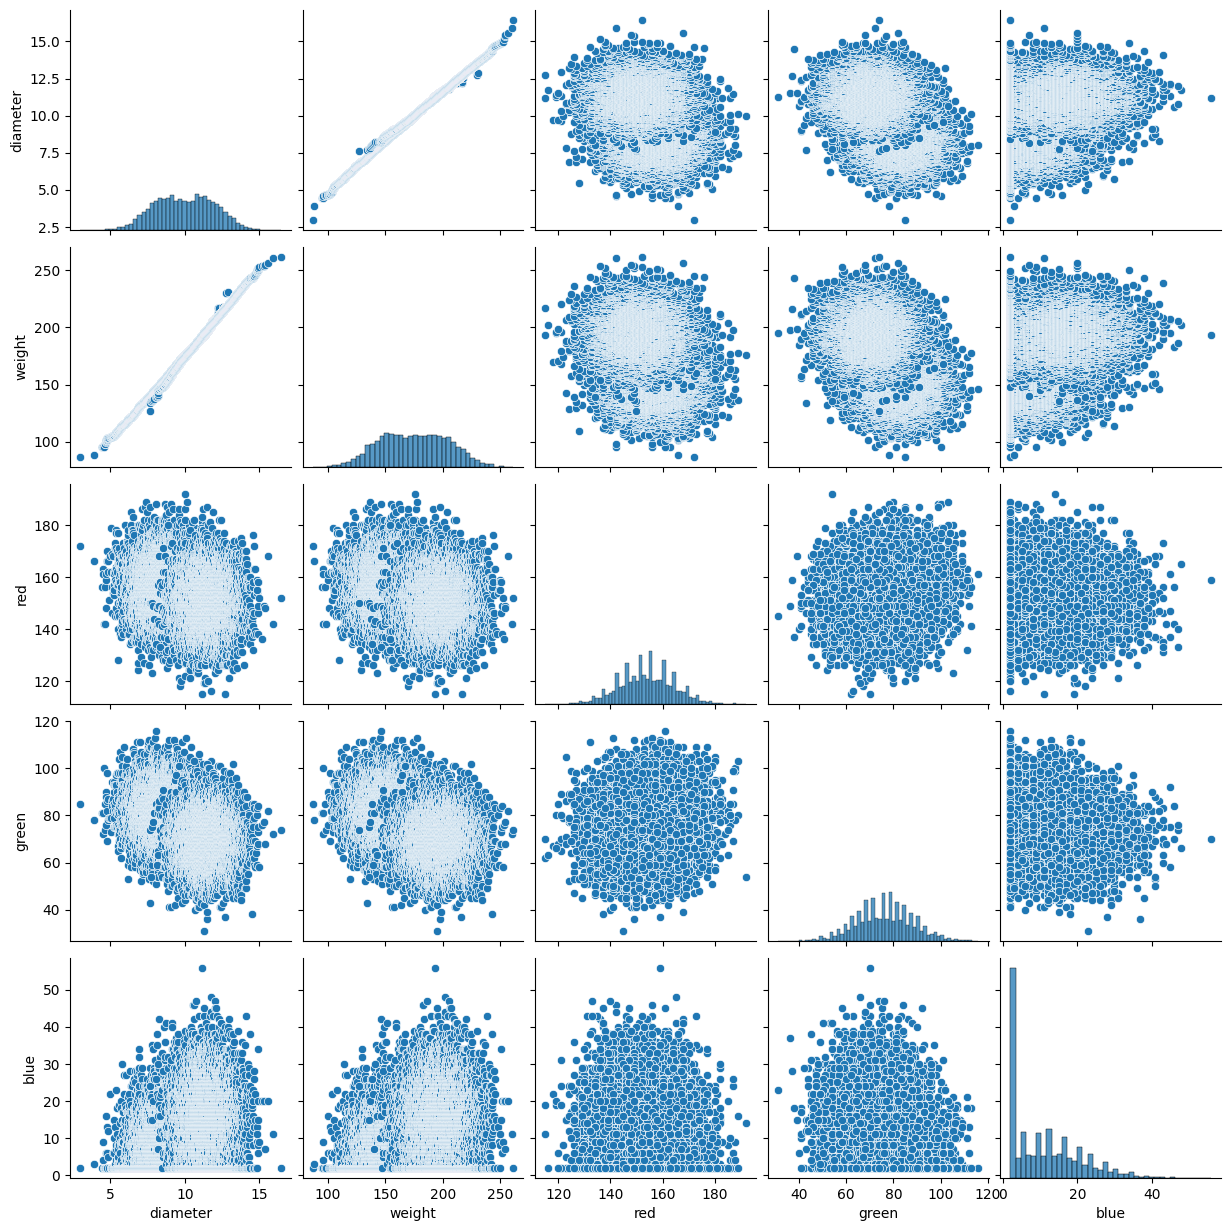

In [12]:
sns.pairplot(df[['name', 'diameter', 'weight', 'red', 'green', 'blue']])

In [26]:
df['name']=df['name'].replace({'orange':1, 'grapefruit':0})

In [27]:
X = df[['diameter', 'weight', 'red', 'green', 'blue']]

In [28]:
y = df[['name']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [30]:
num_attribs = ['diameter', 'weight', 'red', 'green', 'blue']

Building the Pipeline

In [31]:
col_transform = ColumnTransformer(transformers=
   [('num',MinMaxScaler(), num_attribs)])

In [32]:
pipeline = Pipeline([
    ('prep', col_transform),
    ('mlr', LogisticRegression(max_iter=1000))
])

Executing the Model

In [34]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['diameter', 'weight', 'red',
                                                   'green', 'blue'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

Evaluating the Model

In [35]:
y_pred = pipe.predict(X_test)

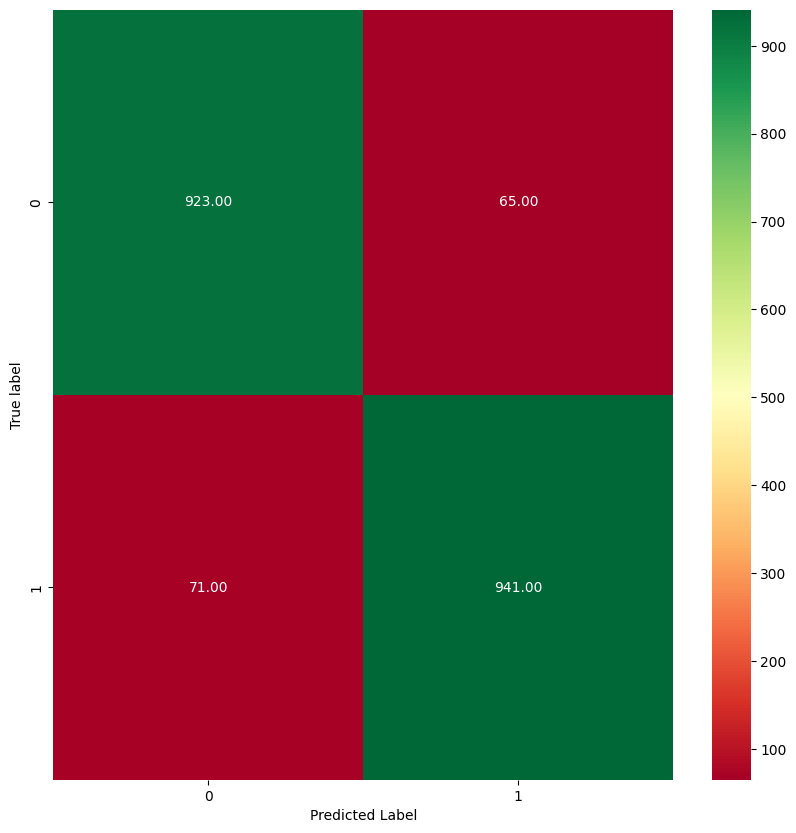

In [36]:
plot_cm(y_test, y_pred)

In [37]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9353876739562624
0.9298418972332015
0.9326065411298315


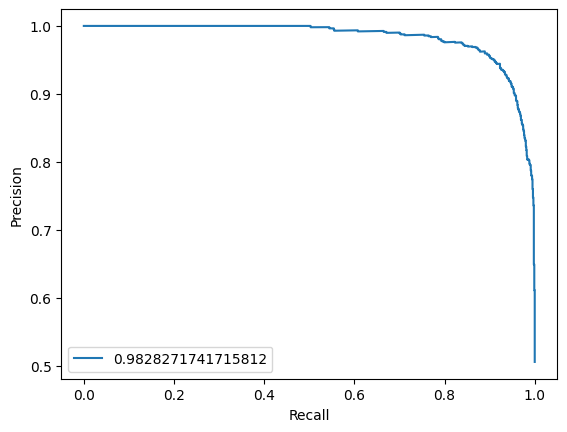

In [38]:
precision, recall, thresholds = precision_recall_curve(y_test, pipe.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure()

plt.plot(recall, precision, label = pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

This model seems fairly accurate in predicting either orange or grapefruit. The precision and recall are both over 90%. It could be improved but overall works fairly well.

Imports for decision trees

In [83]:
from sklearn import tree
from sklearn.tree import export_text

In [84]:
col_transform = ColumnTransformer(transformers=
   [('num',MinMaxScaler(), num_attribs)])

In [123]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
                     ])

Executing the Model

In [124]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['diameter', 'weight', 'red',
                                                   'green', 'blue'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

Evaluating the model

In [125]:
y_pred = pipeline.predict(X_test)

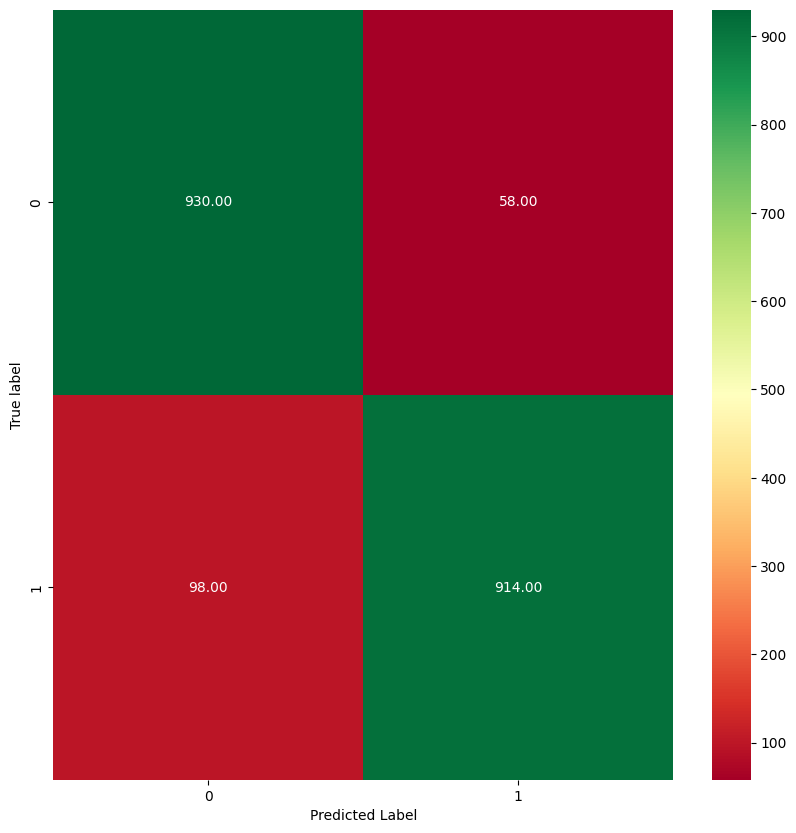

In [126]:
plot_cm(y_test, y_pred)

In [127]:
print('Precision: ', precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision:  0.9403292181069959
Recall: 0.9031620553359684
F1 Score: 0.9213709677419355


GridSearch pipeline

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
col_transform = ColumnTransformer(transformers=
   [('num',MinMaxScaler(), num_attribs)])

In [137]:
pipeline = Pipeline(steps=[('preprocessor', col_transform),
                      ('decision_tree', tree.DecisionTreeClassifier())])

In [138]:
param_grid = {'decision_tree__criterion':['gini','entropy'],'decision_tree__max_depth':[5,10,15,20]}

In [139]:
grid_pipeline = GridSearchCV(pipeline, param_grid)

In [142]:
grid_pipeline.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['diameter',
                                                                          'weight',
                                                                          'red',
                                                                          'green',
                                                                          'blue'])])),
                                       ('decision_tree',
                                        DecisionTreeClassifier())]),
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': [5, 10, 15, 20]})

In [143]:
grid_pipeline.best_params_

{'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 15}

In [144]:
dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [145]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [146]:
y_pred = dt.predict(X_test)

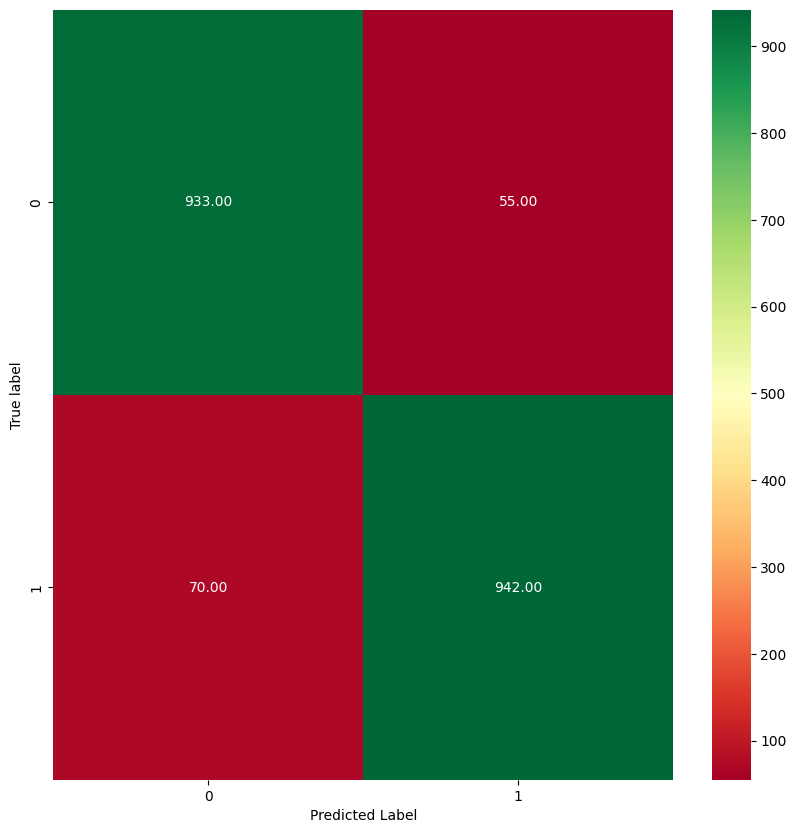

In [147]:
plot_cm(y_test,y_pred)

In [148]:
print("Precision: ", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Precision:  0.9448345035105316
Recall: 0.9308300395256917
F1 Score: 0.9377799900447984


It looks like overall that the Decision Tree performs slightly better than Logistic Regression. They are both fairly accurate however, but leave significant room for improvement.